In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_curve,auc

In [23]:
data=pd.read_csv("DED_Dataset.csv")
data.head(5)

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

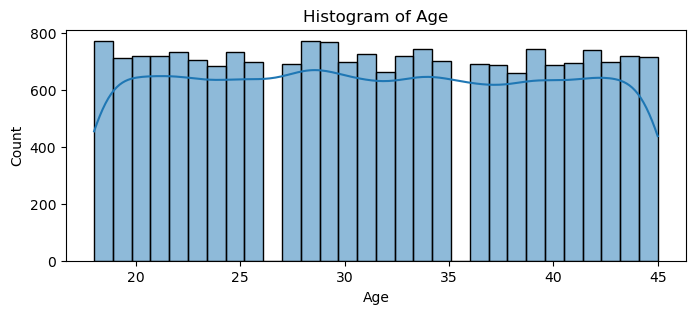

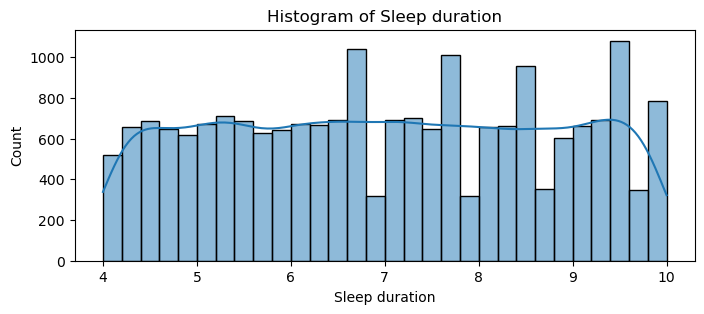

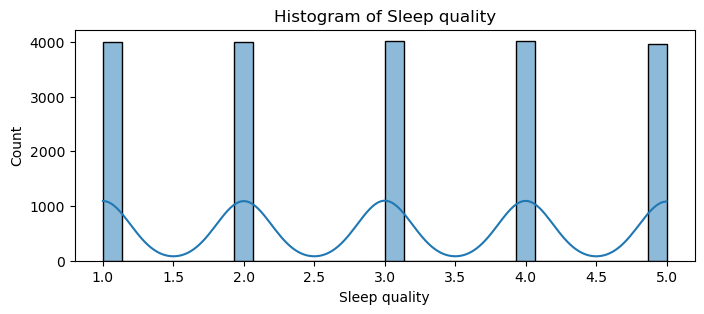

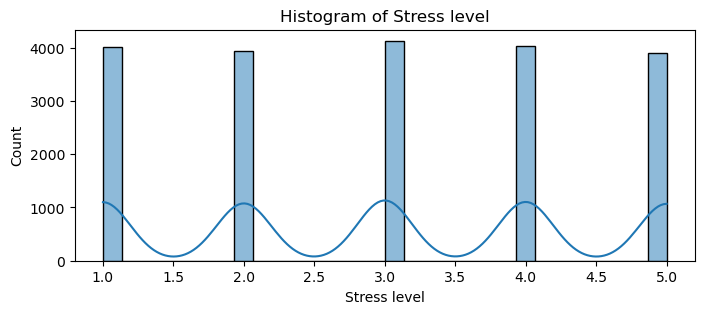

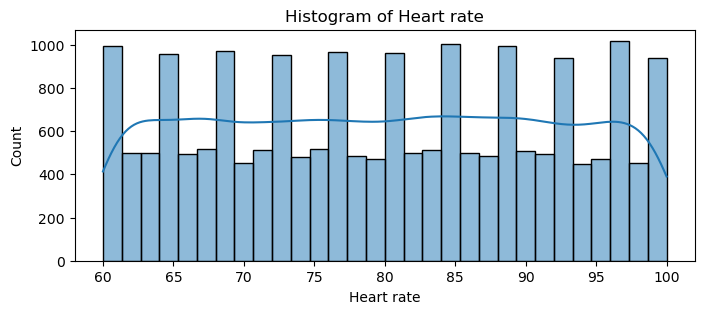

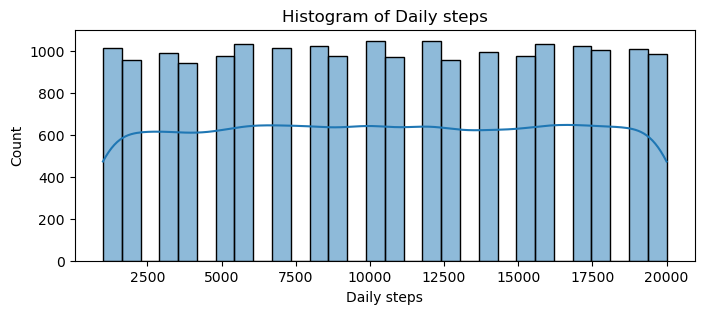

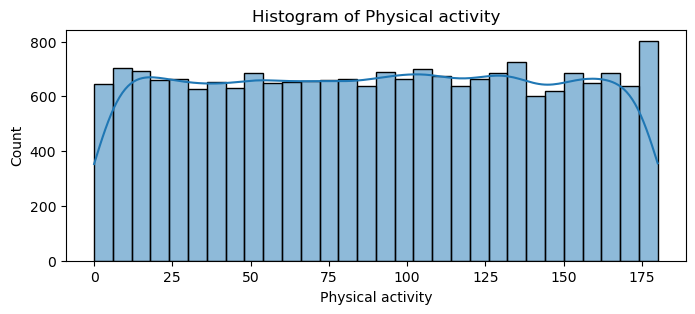

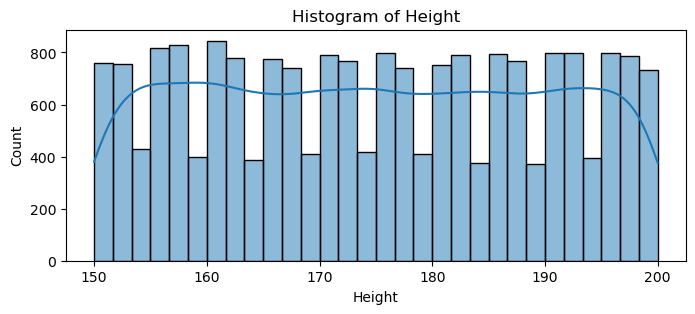

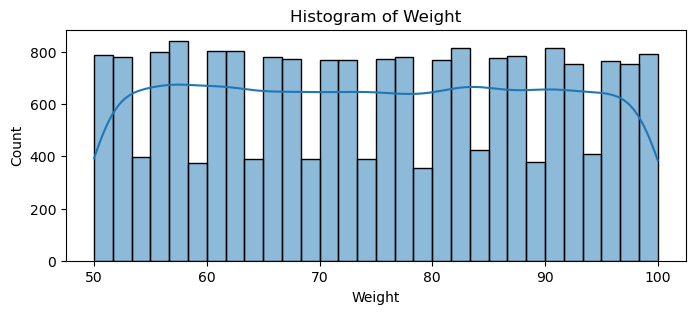

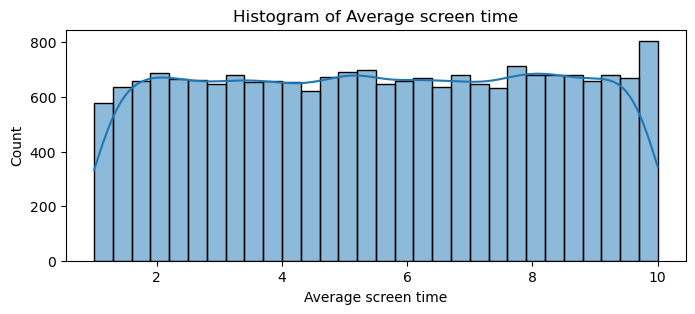

In [25]:
numerical_col=data.select_dtypes(include="number")
for col in numerical_col.columns:
    plt.figure(figsize=(8,3))
    sns.histplot(data=numerical_col[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()

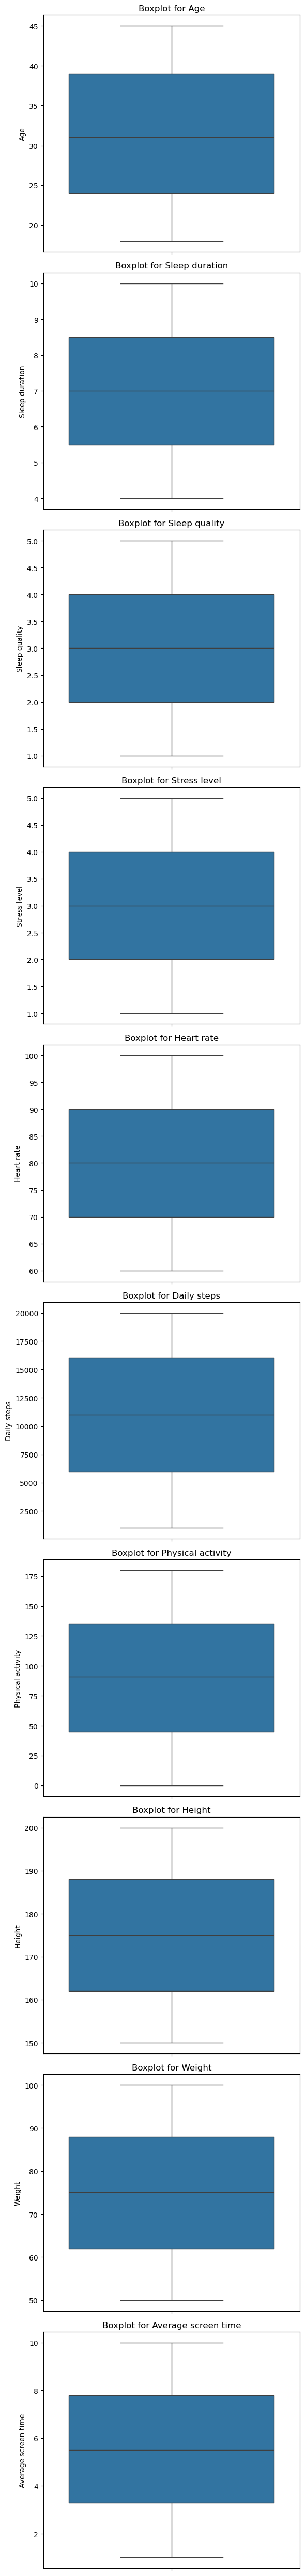

In [26]:
plt.figure(figsize=(6, 5 * len(numerical_col.columns)))  
for i, col in enumerate(numerical_col.columns, 1):
    plt.subplot(len(numerical_col.columns), 1, i) 
    sns.boxplot(data=numerical_col[col])
    plt.title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()

In [27]:
object_col=data.select_dtypes(include="object")
data[object_col.columns] = object_col.replace({"Y": 1, "N": 0}) 

/var/folders/m0/76lst44128q018k0mb5n1j5c0000gn/T/ipykernel_15456/1747666313.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[object_col.columns] = object_col.replace({"Y": 1, "N": 0})


In [28]:
data["Gender"]=data["Gender"].replace({"F":1,"M":0})

/var/folders/m0/76lst44128q018k0mb5n1j5c0000gn/T/ipykernel_15456/2015654894.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"]=data["Gender"].replace({"F":1,"M":0})


In [29]:
le=LabelEncoder()
data["Blood pressure"]=le.fit_transform(data["Blood pressure"])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  int64  
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  int64  
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  int64  
 12  Wake up during night         20000 non-null  int64  
 13  Feel sleepy duri

<Axes: >

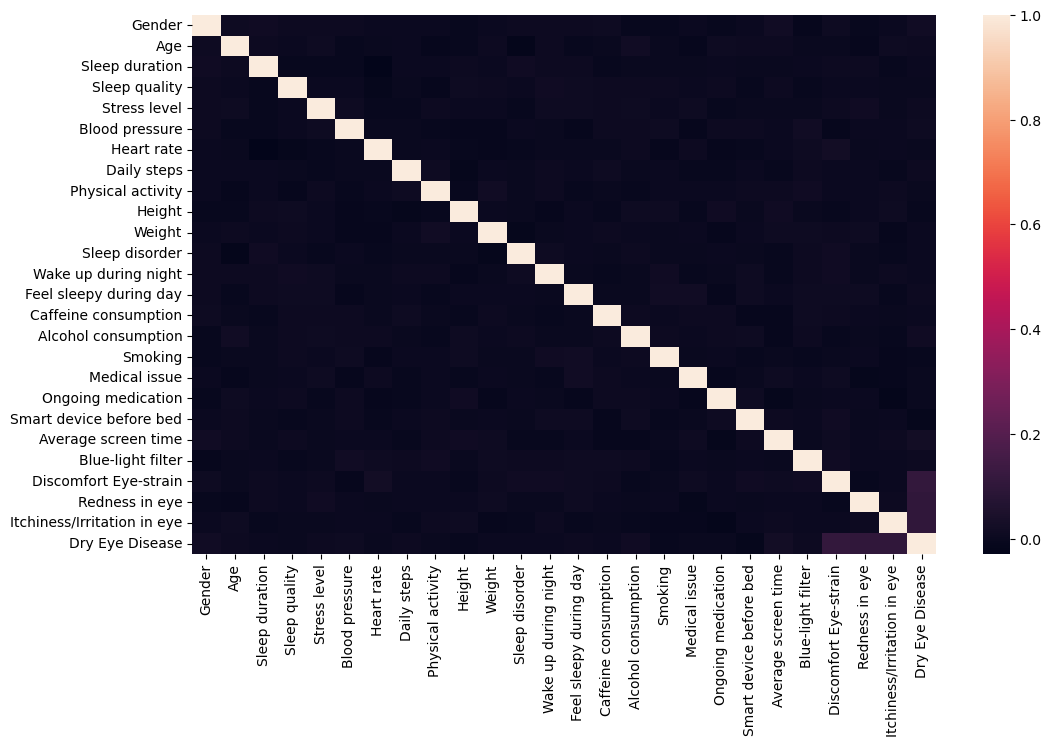

In [31]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr())

In [32]:
data.corr()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
Gender,1.000000,0.007612,0.014073,0.005695,0.006703,0.004377,0.000208,0.000505,0.000253,-0.006942,...,-0.005905,0.001269,-0.005377,0.001701,0.018310,-0.009805,0.010110,-0.007337,0.000282,0.016321
Age,0.007612,1.000000,0.004857,0.002513,0.008379,-0.006273,-0.001196,0.001302,-0.009191,-0.005171,...,-0.003293,-0.010528,0.007507,0.003810,0.003177,-0.002508,-0.001069,-0.010335,0.009893,0.005258
Sleep duration,0.014073,0.004857,1.000000,-0.006892,-0.006088,-0.005137,-0.029175,0.002823,0.001858,0.005259,...,-0.003637,-0.001804,-0.000208,-0.003081,-0.004208,0.002034,0.006544,0.004315,-0.007170,-0.000874
Sleep quality,0.005695,0.002513,-0.006892,1.000000,0.000721,-0.000433,-0.014326,-0.003074,-0.010329,0.009380,...,0.006971,0.000297,0.005858,-0.005133,0.004697,-0.007969,0.001459,0.002843,-0.002597,-0.004990
Stress level,0.006703,0.008379,-0.006088,0.000721,1.000000,0.007032,-0.008332,-0.005978,0.004272,-0.000651,...,0.001165,0.010931,-0.008172,-0.002450,-0.001344,-0.002317,0.003889,0.011989,-0.004114,0.005481
Blood pressure,0.004377,-0.006273,-0.005137,-0.000433,0.007032,1.000000,-0.004331,-0.001340,-0.006392,-0.012364,...,0.010502,-0.009154,0.003406,0.003655,-0.000365,0.016279,-0.009773,0.001880,-0.000066,0.010954
Heart rate,0.000208,-0.001196,-0.029175,-0.014326,-0.008332,-0.004331,1.000000,-0.001899,0.001334,-0.005229,...,-0.010954,0.003898,-0.012871,-0.007891,0.002467,0.008719,0.019235,-0.004331,-0.000182,-0.002083
Daily steps,0.000505,0.001302,0.002823,-0.003074,-0.005978,-0.001340,-0.001899,1.000000,0.008413,-0.016801,...,0.001810,-0.006352,-0.007528,-0.000237,-0.008670,0.006512,0.000107,0.000735,-0.008069,0.005664
Physical activity,0.000253,-0.009191,0.001858,-0.010329,0.004272,-0.006392,0.001334,0.008413,1.000000,-0.005989,...,-0.000228,-0.000766,0.002152,0.004275,0.006469,0.012624,0.001386,0.000689,0.004153,-0.003289
Height,-0.006942,-0.005171,0.005259,0.009380,-0.000651,-0.012364,-0.005229,-0.016801,-0.005989,1.000000,...,0.008979,-0.006909,0.012976,-0.004522,0.012817,-0.002263,-0.008730,0.000840,0.007321,-0.006437


In [33]:
param_grids = {
    "Logistic Regression": {
        'C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 2000, 3000]
    },
    "Ridge Classifier": {
        'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
        'max_iter': [1000, 2000, 3000, 5000]
    },
    "Perceptron": {
        'penalty': [None, 'l2', 'l1', 'elasticnet'],
        'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
        'max_iter': [1000, 2000, 3000, 5000],
        'eta0': [0.1, 0.5, 1.0, 2.0]
    },
    "SGD Classifier": {
        'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
        'max_iter': [1000, 2000, 3000],
        'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
        'eta0': [0.001, 0.01, 0.1, 1.0]
    },
    "Gaussian Naive Bayes": {
        'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
    },
    "Bernoulli Naive Bayes": {
        'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
        'fit_prior': [True, False],
        'binarize': [0.0, 0.1, 0.3, 0.5, 0.7, 1.0]
    }
}

models = {
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "Perceptron": Perceptron(),
    "SGD Classifier": SGDClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB()
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}
best_params = {}
cv_scores = {}

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"{name} 최적 파라미터 탐색 중...")
    print(f"{'='*60}")
    
    grid_search = GridSearchCV(
        model, 
        param_grids[name], 
        cv=kfold, 
        scoring='accuracy', 
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(x_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_
    
    cv_scores[name] = cross_val_score(
        grid_search.best_estimator_, 
        x_train, 
        y_train, 
        cv=kfold, 
        scoring='accuracy'
    )
    
    print(f"\n최적 파라미터: {grid_search.best_params_}")
    print(f"GridSearchCV 최고 점수: {grid_search.best_score_:.4f}")
    print(f"5-Fold CV 점수: {cv_scores[name]}")
    print(f"5-Fold CV 평균: {cv_scores[name].mean():.4f} (+/- {cv_scores[name].std() * 2:.4f})")


Logistic Regression 최적 파라미터 탐색 중...
Fitting 5 folds for each of 180 candidates, totalling 900 fits

최적 파라미터: {'C': 0.05, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 최고 점수: 0.6843
5-Fold CV 점수: [0.67733333 0.687      0.67966667 0.69133333 0.686     ]
5-Fold CV 평균: 0.6843 (+/- 0.0102)

Ridge Classifier 최적 파라미터 탐색 중...
Fitting 5 folds for each of 420 candidates, totalling 2100 fits

최적 파라미터: {'alpha': 0.001, 'max_iter': 1000, 'solver': 'saga'}
GridSearchCV 최고 점수: 0.6797
5-Fold CV 점수: [0.67533333 0.68233333 0.672      0.685      0.68333333]
5-Fold CV 평균: 0.6796 (+/- 0.0101)

Perceptron 최적 파라미터 탐색 중...
Fitting 5 folds for each of 704 candidates, totalling 3520 fits

최적 파라미터: {'alpha': 0.1, 'eta0': 0.5, 'max_iter': 1000, 'penalty': 'l1'}
GridSearchCV 최고 점수: 0.6455
5-Fold CV 점수: [0.63633333 0.65066667 0.64033333 0.65133333 0.649     ]
5-Fold CV 평균: 0.6455 (+/- 0.0121)

SGD Classifier 최적 파라미터 탐색 중...
Fitting 5 folds for each of 7920 candidates, totalling 39600 fits


/opt/homebrew/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



최적 파라미터: {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'optimal', 'loss': 'squared_hinge', 'max_iter': 3000, 'penalty': 'l1'}
GridSearchCV 최고 점수: 0.6899
5-Fold CV 점수: [0.65766667 0.672      0.692      0.69966667 0.65466667]
5-Fold CV 평균: 0.6752 (+/- 0.0360)

Gaussian Naive Bayes 최적 파라미터 탐색 중...
Fitting 5 folds for each of 9 candidates, totalling 45 fits

최적 파라미터: {'var_smoothing': 1e-11}
GridSearchCV 최고 점수: 0.6835
5-Fold CV 점수: [0.67733333 0.68933333 0.679      0.68566667 0.686     ]
5-Fold CV 평균: 0.6835 (+/- 0.0091)

Bernoulli Naive Bayes 최적 파라미터 탐색 중...
Fitting 5 folds for each of 144 candidates, totalling 720 fits

최적 파라미터: {'alpha': 5.0, 'binarize': 1.0, 'fit_prior': True}
GridSearchCV 최고 점수: 0.6847
5-Fold CV 점수: [0.67366667 0.69366667 0.68233333 0.68766667 0.68633333]
5-Fold CV 평균: 0.6847 (+/- 0.0132)


In [34]:
param_grids = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000]
    },
    "Ridge Classifier": {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    },
    "Perceptron": {
        'penalty': [None, 'l2', 'l1', 'elasticnet'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'max_iter': [1000, 2000]
    },
    "SGD Classifier": {
        'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'max_iter': [1000]
    },
    "Gaussian Naive Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    "Bernoulli Naive Bayes": {
        'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0],
        'fit_prior': [True, False]
    }
}

models = {
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "Perceptron": Perceptron(),
    "SGD Classifier": SGDClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB()
}

best_models = {}
best_params = {}

for name, model in models.items():
    print(f"\n{name} 최적 파라미터 탐색 중...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_
    
    print(f"최적 파라미터: {grid_search.best_params_}")
    print(f"최적 Cross-validation 점수: {grid_search.best_score_:.4f}")


Logistic Regression 최적 파라미터 탐색 중...
최적 파라미터: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
최적 Cross-validation 점수: 0.6827

Ridge Classifier 최적 파라미터 탐색 중...
최적 파라미터: {'alpha': 0.001, 'solver': 'auto'}
최적 Cross-validation 점수: 0.6787

Perceptron 최적 파라미터 탐색 중...
최적 파라미터: {'alpha': 0.001, 'max_iter': 1000, 'penalty': 'l1'}
최적 Cross-validation 점수: 0.6456

SGD Classifier 최적 파라미터 탐색 중...
최적 파라미터: {'alpha': 0.01, 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'elasticnet'}
최적 Cross-validation 점수: 0.6801

Gaussian Naive Bayes 최적 파라미터 탐색 중...
최적 파라미터: {'var_smoothing': 1e-09}
최적 Cross-validation 점수: 0.6821

Bernoulli Naive Bayes 최적 파라미터 탐색 중...
최적 파라미터: {'alpha': 0.001, 'fit_prior': True}
최적 Cross-validation 점수: 0.6817



테스트 세트 성능 평가

Logistic Regression:
  최적 파라미터: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
  5-Fold CV:     0.6843 (+/- 0.0102)
  Test Accuracy: 0.6920
  Precision:     0.6993
  Recall:        0.9487
  F1 Score:      0.8052
  AUC:           0.5874

Ridge Classifier:
  최적 파라미터: {'alpha': 0.001, 'solver': 'auto'}
  5-Fold CV:     0.6796 (+/- 0.0101)
  Test Accuracy: 0.6872
  Precision:     0.6939
  Recall:        0.9550
  F1 Score:      0.8038
  AUC:           0.5873

Perceptron:
  최적 파라미터: {'alpha': 0.001, 'max_iter': 1000, 'penalty': 'l1'}
  5-Fold CV:     0.6455 (+/- 0.0121)
  Test Accuracy: 0.6032
  Precision:     0.6832
  Recall:        0.7618
  F1 Score:      0.7203
  AUC:           0.5494

SGD Classifier:
  최적 파라미터: {'alpha': 0.01, 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'elasticnet'}
  5-Fold CV:     0.6752 (+/- 0.0360)
  Test Accuracy: 0.6944
  Precision:     0.7015
  Recall:        0.9475
  F1 Score:      0.8062
  AUC:           0.5868

Gau

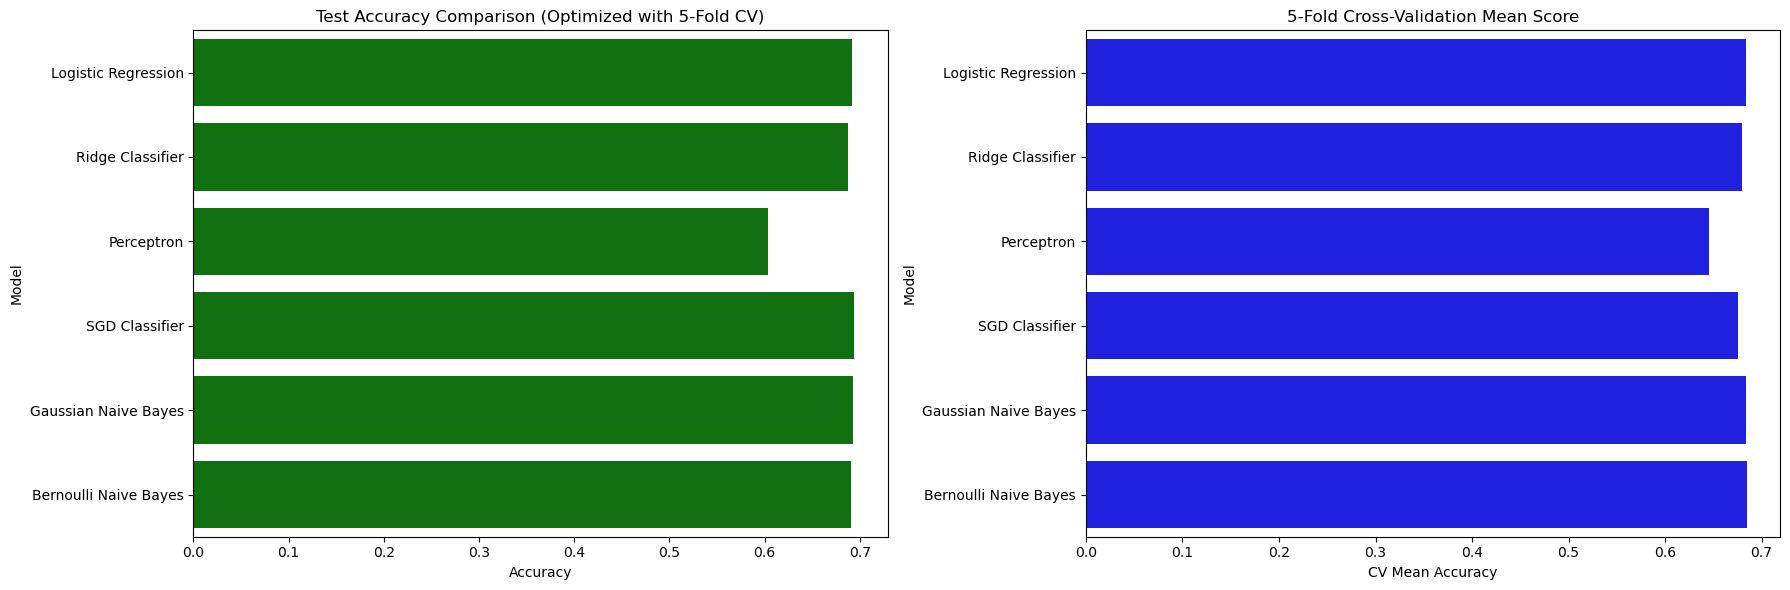

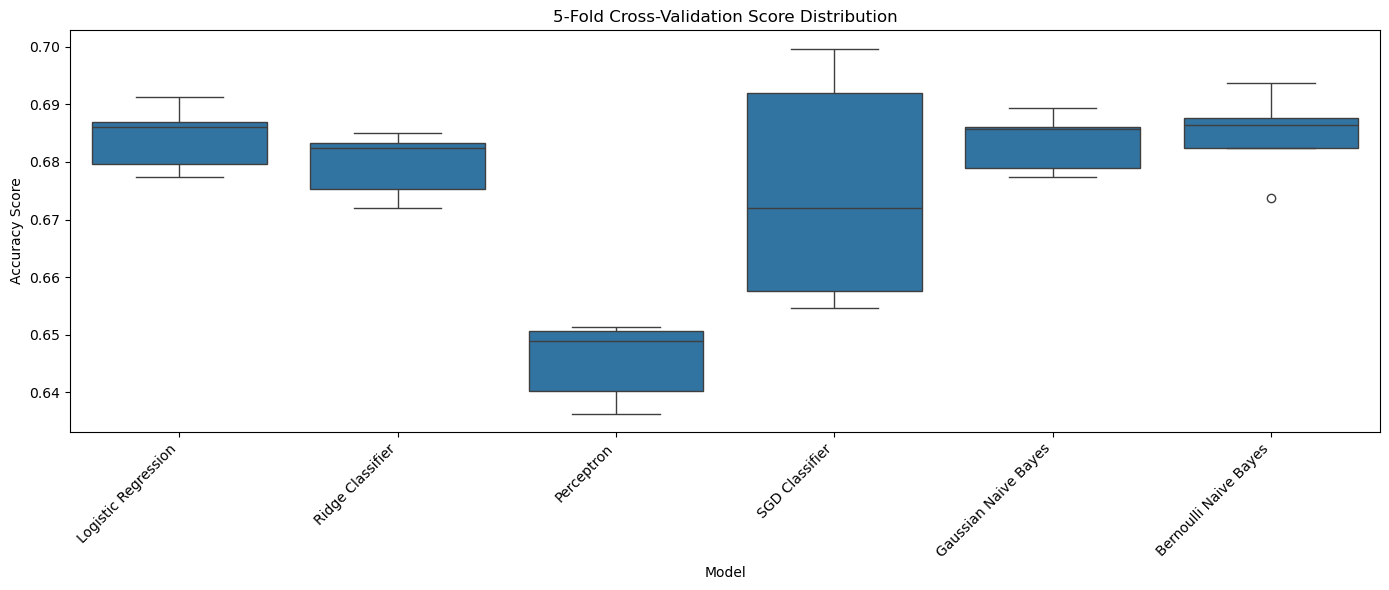

In [35]:
metrics = []

print("\n" + "="*80)
print("테스트 세트 성능 평가")
print("="*80)

for name, model in best_models.items():
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)[:, 1]
    else:
        y_prob = model.decision_function(x_test)
        y_prob = (y_prob - np.min(y_prob)) / (np.max(y_prob) - np.min(y_prob))
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    
    metrics.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC": auc_score,
        "CV Mean": cv_scores[name].mean(),
        "CV Std": cv_scores[name].std(),
        "Best Params": str(best_params[name])
    })
    
    print(f"\n{name}:")
    print(f"  최적 파라미터: {best_params[name]}")
    print(f"  5-Fold CV:     {cv_scores[name].mean():.4f} (+/- {cv_scores[name].std() * 2:.4f})")
    print(f"  Test Accuracy: {acc:.4f}")
    print(f"  Precision:     {prec:.4f}")
    print(f"  Recall:        {rec:.4f}")
    print(f"  F1 Score:      {f1:.4f}")
    print(f"  AUC:           {auc_score:.4f}")

results = pd.DataFrame(metrics)
print("\n" + "="*80)
print("전체 결과 요약")
print("="*80)
print(results[["Model", "CV Mean", "CV Std", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"]].to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x="Accuracy", y="Model", data=results, color="green", ax=axes[0])
axes[0].set_title("Test Accuracy Comparison (Optimized with 5-Fold CV)")
axes[0].set_xlabel("Accuracy")

sns.barplot(x="CV Mean", y="Model", data=results, color="blue", ax=axes[1])
axes[1].set_title("5-Fold Cross-Validation Mean Score")
axes[1].set_xlabel("CV Mean Accuracy")

plt.tight_layout()
plt.show()

cv_data = []
for name in best_models.keys():
    for fold, score in enumerate(cv_scores[name], 1):
        cv_data.append({"Model": name, "Fold": fold, "Score": score})

cv_df = pd.DataFrame(cv_data)
plt.figure(figsize=(14, 6))
sns.boxplot(x="Model", y="Score", data=cv_df)
plt.xticks(rotation=45, ha='right')
plt.title("5-Fold Cross-Validation Score Distribution")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()


Logistic Regression:
  최적 파라미터: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
  Accuracy:  0.6920
  Precision: 0.6993
  Recall:    0.9487
  F1 Score:  0.8052
  AUC:       0.5874

Ridge Classifier:
  최적 파라미터: {'alpha': 0.001, 'solver': 'auto'}
  Accuracy:  0.6872
  Precision: 0.6939
  Recall:    0.9550
  F1 Score:  0.8038
  AUC:       0.5873

Perceptron:
  최적 파라미터: {'alpha': 0.001, 'max_iter': 1000, 'penalty': 'l1'}
  Accuracy:  0.6032
  Precision: 0.6832
  Recall:    0.7618
  F1 Score:  0.7203
  AUC:       0.5494

SGD Classifier:
  최적 파라미터: {'alpha': 0.01, 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'elasticnet'}
  Accuracy:  0.6944
  Precision: 0.7015
  Recall:    0.9475
  F1 Score:  0.8062
  AUC:       0.5868

Gaussian Naive Bayes:
  최적 파라미터: {'var_smoothing': 1e-09}
  Accuracy:  0.6926
  Precision: 0.6994
  Recall:    0.9502
  F1 Score:  0.8057
  AUC:       0.5882

Bernoulli Naive Bayes:
  최적 파라미터: {'alpha': 0.001, 'fit_prior': True}
  Accuracy:  0.6

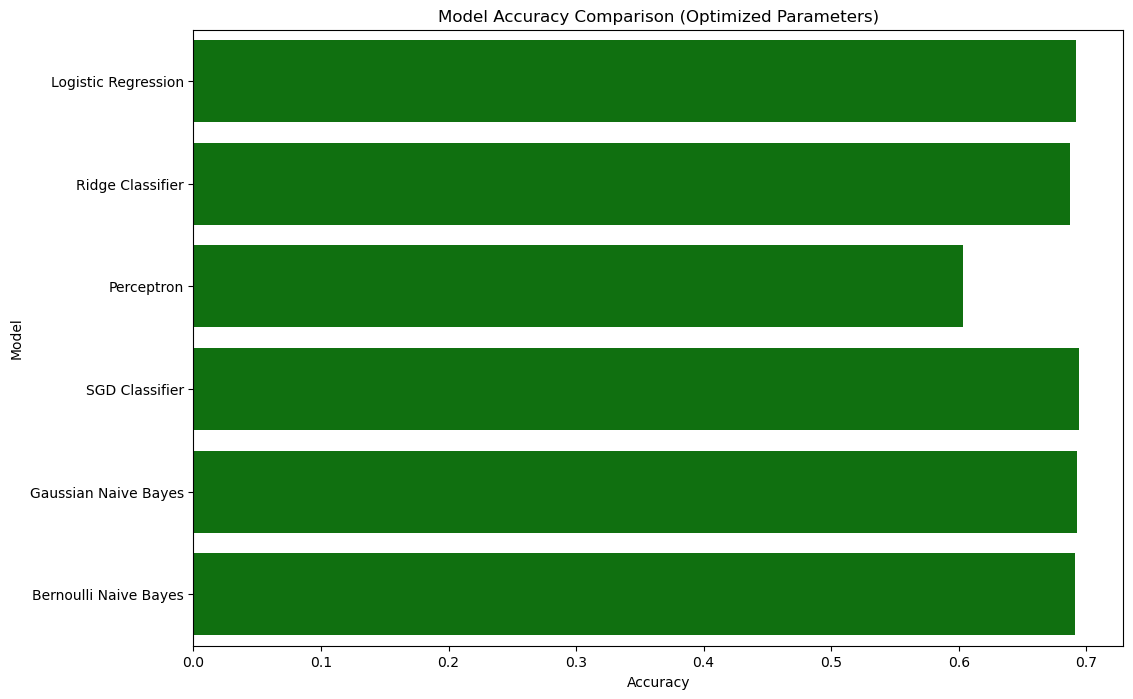

In [36]:
metrics = []

for name, model in best_models.items():
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)[:, 1]
    else:
        y_prob = model.decision_function(x_test)
        y_prob = (y_prob - np.min(y_prob)) / (np.max(y_prob) - np.min(y_prob))
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    
    metrics.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC": auc_score,
        "Best Params": best_params[name]
    })
    
    print(f"\n{name}:")
    print(f"  최적 파라미터: {best_params[name]}")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    print(f"  AUC:       {auc_score:.4f}")

results = pd.DataFrame(metrics)
print("\n=== 전체 결과 요약 ===")
print(results[["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"]])

plt.figure(figsize=(12,8))
sns.barplot(x="Accuracy", y="Model", data=results, color="green")
plt.title("Model Accuracy Comparison (Optimized Parameters)")
plt.show()